In [29]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from cmapPy.pandasGEXpress.parse import parse

from scipy.stats import spearmanr as scor
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu as mwu

from sklearn.metrics import roc_curve as ROC
from sklearn.metrics import auc as AUC
from sklearn.metrics import precision_recall_curve as PRC

# Importing data for comparison

In [30]:
#Importing CREEDs benchmark data files 
gene_perturb=pd.read_csv('../results/gene_pert.csv', sep=',', index_col=0, header=0)
drug_perturb=pd.read_csv('../results/drug_pert.csv', sep=',', index_col=0, header=0)
gene_meta=pd.read_csv('../results/gene_perturb.csv', sep=',', index_col=0, header=0)
drug_meta=pd.read_csv('../results/drug_perturb.csv', sep=',', index_col=0, header=0)

In [31]:
#Checking the absolut values of the benchmark data also
gene_perturb_A=gene_perturb.abs()
drug_perturb_A=drug_perturb.abs()
gene_perturb_A.to_csv('../results/gene_pert_A.csv', sep=',')
drug_perturb_A.to_csv('../results/drug_pert_A.csv', sep=',')

In [32]:
#Importing the NicheNet model
nn_model=pd.read_csv('../data/ligand_target_matrix.csv', sep=',', header=0, index_col=0)
nn_model = nn_model.reindex(sorted(nn_model.columns), axis=1)

In [33]:
lr_network=pd.read_csv('../data/lr_network.csv', sep=',', header=0, index_col=0)
good_source = ['kegg_cytokines', 'kegg_cams', 'kegg_neuroactive', 'kegg_ecm', 'pharmacology', 'ramilowski_known']
lr_network = lr_network[np.in1d(lr_network['source'], good_source)]

In [34]:
#Importing LINCS perturbation signatures 
consig_gse70138_trt_cp=pd.read_csv('../results/consensus_signature_gse70138_trt_cp.csv', header=0, sep=',', index_col=0)
consig_gse70138_trt_xpr=pd.read_csv('../results/consensus_signature_gse70138_trt_xpr.csv', header=0, sep=',', index_col=0)
consig_gse92742_trt_cp=pd.read_csv('../results/consensus_signature_gse92742_trt_cp.csv', header=0, sep=',', index_col=0)
consig_gse92742_trt_lig=pd.read_csv('../results/consensus_signature_gse92742_trt_lig.csv', header=0, sep=',', index_col=0)
consig_gse92742_trt_oe=pd.read_csv('../results/consensus_signature_gse92742_trt_oe.csv', header=0, sep=',', index_col=0)
consig_gse92742_trt_sh=pd.read_csv('../results/consensus_signature_gse92742_trt_sh.csv', header=0, sep=',', index_col=0)
consig_gse92742_trt_sh_fil=pd.read_csv('../results/consensus_signature_gse92742_trt_sh_fil.csv', header=0, sep=',', index_col=0)

In [35]:
#Checking the absolut values of LINCS also
consig_gse70138_trt_cp_A=consig_gse70138_trt_cp.abs()
consig_gse70138_trt_xpr_A=consig_gse70138_trt_xpr.abs()
consig_gse92742_trt_cp_A=consig_gse92742_trt_cp.abs()
consig_gse92742_trt_lig_A=consig_gse92742_trt_lig.abs()
consig_gse92742_trt_oe_A=consig_gse92742_trt_oe.abs()
consig_gse92742_trt_sh_A=consig_gse92742_trt_sh.abs()
consig_gse92742_trt_sh_fil_A=consig_gse92742_trt_sh_fil.abs()

In [36]:
consig_gse70138_trt_xpr=consig_gse70138_trt_xpr.T
consig_gse92742_trt_lig=consig_gse92742_trt_lig.T
consig_gse92742_trt_oe=consig_gse92742_trt_oe.T
consig_gse92742_trt_sh=consig_gse92742_trt_sh.T
consig_gse92742_trt_sh_fil=consig_gse92742_trt_sh_fil.T

consig_gse70138_trt_xpr_A=consig_gse70138_trt_xpr_A.T
consig_gse92742_trt_lig_A=consig_gse92742_trt_lig_A.T
consig_gse92742_trt_oe_A=consig_gse92742_trt_oe_A.T
consig_gse92742_trt_sh_A=consig_gse92742_trt_sh_A.T
consig_gse92742_trt_sh_fil_A=consig_gse92742_trt_sh_fil_A.T

# NicheNet vs. CREEDs

### NN vs. drug_perturb

In [49]:
drug_perturb.shape

(7781, 387)

In [50]:
nn_model.shape

(25345, 688)

In [51]:
common_genes=list(set(nn_model.index)& set(drug_perturb.index))

In [52]:
len(common_genes)

7727

In [53]:
nn_model=nn_model.loc[common_genes]
drug_perturb=drug_perturb.loc[common_genes]
drug_perturb_A=drug_perturb_A.loc[common_genes]

In [62]:
drug_perturb.shape

(7727, 387)

In [55]:
nn_model.shape

(7727, 688)

In [56]:
drug_perturb.head()

,1416,1074,925,345,551,750,885,1584,1585,636,...,1912,552,1362,668,697,1369,550,1579,1219,1514
FAM3A,1.528467,-0.150743,0.222181,-0.470496,0.731880,-0.181326,3.436021,-1.500258,-1.500258,0.068688,...,-0.054181,-0.471603,1.638888,0.813216,1.220660,7.955420,2.458027,-1.388246,0.192524,0.089808
MPI,-0.349662,-2.366964,-0.065323,0.101187,-0.379393,0.432761,3.318031,1.594171,1.594171,-0.759975,...,1.402696,-0.200662,-1.609156,2.248813,0.453140,2.587244,2.098900,1.275870,-0.174179,-0.738923
MIER2,-1.125718,0.779621,-0.603046,-0.580376,0.836180,1.459272,1.060877,0.616406,0.616406,-0.509168,...,1.237060,-3.720114,-0.269386,-0.343174,0.976845,-0.602606,-1.084516,1.839062,-1.892136,0.419547
ARHGEF10,-0.178789,0.251414,-1.485443,0.183717,0.564224,1.062560,-1.319166,-0.834716,-0.834716,-0.852956,...,-1.157459,-1.534592,-1.136904,-1.125984,-0.257826,8.268007,1.298609,0.539243,-1.166287,0.863441
SPATA24,1.005510,-2.834021,3.133430,-1.404423,0.773887,-0.140430,-0.627203,1.616636,1.616636,-0.366637,...,2.014616,1.198471,-0.936847,-0.579943,-4.438929,-10.927265,-0.068208,-0.686556,-0.744657,0.740323


In [67]:
drug_NN=pd.DataFrame(index=nn_model.columns, columns=drug_perturb.columns)
drug_A_NN=pd.DataFrame(index=nn_model.columns, columns=drug_perturb_A.columns)

In [68]:
drug_NN.head()

,1416,1074,925,345,551,750,885,1584,1585,636,...,1912,552,1362,668,697,1369,550,1579,1219,1514
A2M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AANAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADAM12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADAM15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADAM17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
for lig in drug_NN.index:
    for exp in drug_NN.columns:
        r=pearsonr(nn_model[lig],drug_perturb[exp])
        r=r[0]
        drug_NN.loc[lig,exp]=r

C:\Users\nidik\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [70]:
for lig in drug_A_NN.index:
    for exp in drug_A_NN.columns:
        r=pearsonr(nn_model[lig],drug_perturb_A[exp])
        r=r[0]
        drug_A_NN.loc[lig,exp]=r

In [72]:
drug_NN.to_csv('../results/drug_NN_sim.csv', sep=',')
drug_A_NN.to_csv('../results/drug_A_NN_sim.csv', sep=',')

### NN vs. gene_perturb

In [73]:
common_genes=list(set(nn_model.index)& set(gene_perturb.index))
len(common_genes)

6826

In [74]:
nn_model=nn_model.loc[common_genes]
gene_perturb=gene_perturb.loc[common_genes]
gene_perturb_A=gene_perturb_A.loc[common_genes]

In [75]:
gene_NN=pd.DataFrame(index=nn_model.columns, columns=gene_perturb.columns)
gene_A_NN=pd.DataFrame(index=nn_model.columns, columns=gene_perturb_A.columns)

In [76]:
gene_NN.head()

,2410,2860,2487,2723,1319,3062,169,358,2422,2338,...,1830,2025,2777,2993,1946,2389,378,2411,2982,2742
A2M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AANAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADAM12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADAM15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADAM17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
for lig in gene_NN.index:
    for exp in gene_NN.columns:
        r=pearsonr(nn_model[lig],gene_perturb[exp])
        r=r[0]
        gene_NN.loc[lig,exp]=r

C:\Users\nidik\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [78]:
for lig in gene_A_NN.index:
    for exp in gene_A_NN.columns:
        r=pearsonr(nn_model[lig],gene_perturb_A[exp])
        r=r[0]
        gene_A_NN.loc[lig,exp]=r

In [80]:
gene_NN.to_csv('../results/gene_NN_sim.csv', sep=',')
gene_A_NN.to_csv('../results/gene_A_NN_sim.csv', sep=',')

# LINCS vs. CREEDs

In [43]:
def lincs_creeds_sim(consig, creeds_name, fname):
    creeds=pd.read_csv('../results/'+creeds_name+'.csv',sep=',', index_col=0, header=0)
    common_genes=list(set(consig.index)& set(creeds.index))
    creeds=creeds.loc[common_genes]
    consig=consig.loc[common_genes]
    similarity_fname=pd.DataFrame(index=consig.columns, columns=creeds.columns)
    for lig in similarity_fname.index:
        for exp in similarity_fname.columns:
            r=pearsonr(consig[lig],creeds[exp])
            r=r[0]
            similarity_fname.loc[lig,exp]=r
    similarity_fname.to_csv('../results/'+creeds_name+'_'+fname+'.csv', sep=',')
    #return similarity_fname.head()

### LINCS vs. drug_perturb

In [45]:
lincs_creeds_sim(consig_gse70138_trt_xpr, 'drug_pert', 'gse70138_trt_xpr')
lincs_creeds_sim(consig_gse70138_trt_xpr_A, 'drug_pert', 'gse70138_trt_xpr_A')
lincs_creeds_sim(consig_gse92742_trt_lig, 'drug_pert', 'gse70138_trt_lig')
lincs_creeds_sim(consig_gse92742_trt_lig_A, 'drug_pert', 'gse70138_trt_lig_A')
lincs_creeds_sim(consig_gse92742_trt_oe, 'drug_pert', 'gse70138_trt_oe')
lincs_creeds_sim(consig_gse92742_trt_oe_A, 'drug_pert', 'gse70138_trt_oe_A')
lincs_creeds_sim(consig_gse92742_trt_sh, 'drug_pert', 'gse70138_trt_sh')
lincs_creeds_sim(consig_gse92742_trt_sh_A, 'drug_pert', 'gse70138_trt_sh_A')
lincs_creeds_sim(consig_gse92742_trt_sh_fil, 'drug_pert', 'gse70138_trt_sh_fil')
lincs_creeds_sim(consig_gse92742_trt_sh_fil_A, 'drug_pert', 'gse70138_trt_sh_fil_A')

### LINCS vs. drug_perturb_A

In [46]:
lincs_creeds_sim(consig_gse70138_trt_xpr, 'drug_pert_A', 'gse70138_trt_xpr')
lincs_creeds_sim(consig_gse70138_trt_xpr_A, 'drug_pert_A', 'gse70138_trt_xpr_A')
lincs_creeds_sim(consig_gse92742_trt_lig, 'drug_pert_A', 'gse70138_trt_lig')
lincs_creeds_sim(consig_gse92742_trt_lig_A, 'drug_pert_A', 'gse70138_trt_lig_A')
lincs_creeds_sim(consig_gse92742_trt_oe, 'drug_pert_A', 'gse70138_trt_oe')
lincs_creeds_sim(consig_gse92742_trt_oe_A, 'drug_pert_A', 'gse70138_trt_oe_A')
lincs_creeds_sim(consig_gse92742_trt_sh, 'drug_pert_A', 'gse70138_trt_sh')
lincs_creeds_sim(consig_gse92742_trt_sh_A, 'drug_pert_A', 'gse70138_trt_sh_A')
lincs_creeds_sim(consig_gse92742_trt_sh_fil, 'drug_pert_A', 'gse70138_trt_sh_fil')
lincs_creeds_sim(consig_gse92742_trt_sh_fil_A, 'drug_pert_A', 'gse70138_trt_sh_fil_A')

### LINCS vs. gene_perturb

In [47]:
lincs_creeds_sim(consig_gse70138_trt_xpr, 'gene_pert', 'gse70138_trt_xpr')
lincs_creeds_sim(consig_gse70138_trt_xpr_A, 'gene_pert', 'gse70138_trt_xpr_A')
lincs_creeds_sim(consig_gse92742_trt_lig, 'gene_pert', 'gse70138_trt_lig')
lincs_creeds_sim(consig_gse92742_trt_lig_A, 'gene_pert', 'gse70138_trt_lig_A')
lincs_creeds_sim(consig_gse92742_trt_oe, 'gene_pert', 'gse70138_trt_oe')
lincs_creeds_sim(consig_gse92742_trt_oe_A, 'gene_pert', 'gse70138_trt_oe_A')
lincs_creeds_sim(consig_gse92742_trt_sh, 'gene_pert', 'gse70138_trt_sh')
lincs_creeds_sim(consig_gse92742_trt_sh_A, 'gene_pert', 'gse70138_trt_sh_A')
lincs_creeds_sim(consig_gse92742_trt_sh_fil, 'gene_pert', 'gse70138_trt_sh_fil')
lincs_creeds_sim(consig_gse92742_trt_sh_fil_A, 'gene_pert', 'gse70138_trt_sh_fil_A')

### LINCS vs. gene_perturb_A

In [48]:
lincs_creeds_sim(consig_gse70138_trt_xpr, 'gene_pert_A', 'gse70138_trt_xpr')
lincs_creeds_sim(consig_gse70138_trt_xpr_A, 'gene_pert_A', 'gse70138_trt_xpr_A')
lincs_creeds_sim(consig_gse92742_trt_lig, 'gene_pert_A', 'gse70138_trt_lig')
lincs_creeds_sim(consig_gse92742_trt_lig_A, 'gene_pert_A', 'gse70138_trt_lig_A')
lincs_creeds_sim(consig_gse92742_trt_oe, 'gene_pert_A', 'gse70138_trt_oe')
lincs_creeds_sim(consig_gse92742_trt_oe_A, 'gene_pert_A', 'gse70138_trt_oe_A')
lincs_creeds_sim(consig_gse92742_trt_sh, 'gene_pert_A', 'gse70138_trt_sh')
lincs_creeds_sim(consig_gse92742_trt_sh_A, 'gene_pert_A', 'gse70138_trt_sh_A')
lincs_creeds_sim(consig_gse92742_trt_sh_fil, 'gene_pert_A', 'gse70138_trt_sh_fil')
lincs_creeds_sim(consig_gse92742_trt_sh_fil_A, 'gene_pert_A', 'gse70138_trt_sh_fil_A')

# Evaluating similarity with ROC curves

### Comparing NicheNet with CREEDs

NicheNet vs. single gene perturbation

In [37]:
similarity=pd.read_csv('../results/gene_NN_sim.csv',sep=',',header=0,index_col=0)

In [52]:
meta = pd.read_csv('../results/gene_perturb.csv', sep=',', header=0, index_col=0)

In [39]:
true_matrix = pd.DataFrame(0, index=similarity.index, columns=similarity.columns)
for sample in true_matrix.columns:
    target = meta.loc[int(sample), 'hs_gene_symbol']
    fil = lr_network['to'] == target
    ligands = lr_network['from'][fil].unique()
    ligands = list(set(ligands) & set(true_matrix.index))
    true_matrix.loc[ligands, sample] = 1
    if target in true_matrix.index:
        true_matrix.loc[target, sample] = 1

In [40]:
y_pr = similarity.values.reshape((1, -1))[0]
y_tr = true_matrix.values.reshape((1, -1))[0]
fil = ~pd.isna(y_pr)
y_pr = y_pr[fil]
y_tr = y_tr[fil]

In [41]:
fpr, tpr, dummy = ROC(y_tr, y_pr)

0.546014849206806

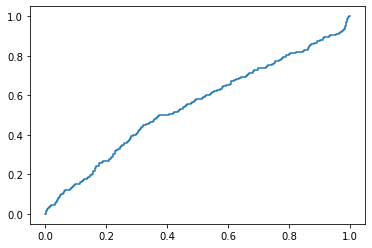

In [42]:
plt.plot(fpr, tpr)
AUC(fpr, tpr)
plt.xlabel('False positive rate', size=15)
plt.ylabel('True positive rate', size=15)
plt.title('NicheNet vs. single_gene_pert', size=12)
plt.legend(['ROC AUC=' + str(AUC(fpr, tpr))[:4]])
plt.tight_layout()
print(AUC(fpr, tpr))
plt.tight_layout()

In [43]:
similarity=pd.read_csv('../results/gene_A_NN_sim.csv',sep=',',header=0,index_col=0)

In [44]:
true_matrix = pd.DataFrame(0, index=similarity.index, columns=similarity.columns)
for sample in true_matrix.columns:
    target = meta.loc[int(sample), 'hs_gene_symbol']
    fil = lr_network['to'] == target
    ligands = lr_network['from'][fil].unique()
    ligands = list(set(ligands) & set(true_matrix.index))
    true_matrix.loc[ligands, sample] = 1
    if target in true_matrix.index:
        true_matrix.loc[target, sample] = 1

In [45]:
y_pr = similarity.values.reshape((1, -1))[0]
y_tr = true_matrix.values.reshape((1, -1))[0]
fil = ~pd.isna(y_pr)
y_pr = y_pr[fil]
y_tr = y_tr[fil]

In [46]:
fpr, tpr, dummy = ROC(y_tr, y_pr)

0.5638496194654743

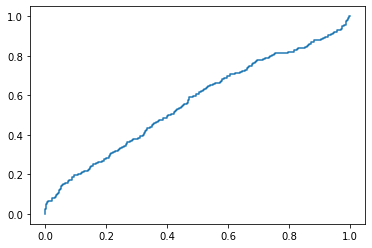

In [47]:
plt.plot(fpr, tpr)
AUC(fpr, tpr)
plt.xlabel('False positive rate', size=15)
plt.ylabel('True positive rate', size=15)
plt.title('NicheNet vs. single_gene_pert_A', size=12)
plt.legend(['ROC AUC=' + str(AUC(fpr, tpr))[:4]])
plt.tight_layout()
print(AUC(fpr, tpr))
plt.tight_layout()

NicheNet vs. single drug perturbation

In [49]:
similarity=pd.read_csv('../results/drug_NN_sim.csv',sep=',',header=0,index_col=0)

In [54]:
meta = pd.read_csv('../results/drug_perturb.csv', sep=',', header=0, index_col=0)

In [56]:
true_matrix = pd.DataFrame(0, index=similarity.index, columns=similarity.columns)
for sample in true_matrix.columns:
    target = meta.loc[int(sample), 'Target']
    fil = lr_network['to'] == target
    ligands = lr_network['from'][fil].unique()
    ligands = list(set(ligands) & set(true_matrix.index))
    true_matrix.loc[ligands, sample] = 1
    if target in true_matrix.index:
        true_matrix.loc[target, sample] = 1

In [57]:
y_pr = similarity.values.reshape((1, -1))[0]
y_tr = true_matrix.values.reshape((1, -1))[0]
fil = ~pd.isna(y_pr)
y_pr = y_pr[fil]
y_tr = y_tr[fil]

In [58]:
fpr, tpr, dummy = ROC(y_tr, y_pr)

0.6374196800529375

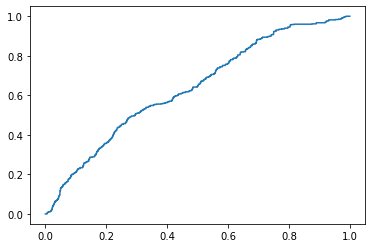

In [59]:
plt.plot(fpr, tpr)
AUC(fpr, tpr)plt.xlabel('False positive rate', size=15)
plt.ylabel('True positive rate', size=15)
plt.title('NicheNet vs. single_drug_pert', size=12)
plt.legend(['ROC AUC=' + str(AUC(fpr, tpr))[:4]])
plt.tight_layout()
print(AUC(fpr, tpr))
plt.tight_layout()

In [60]:
similarity=pd.read_csv('../results/drug_A_NN_sim.csv',sep=',',header=0,index_col=0)

In [61]:
true_matrix = pd.DataFrame(0, index=similarity.index, columns=similarity.columns)
for sample in true_matrix.columns:
    target = meta.loc[int(sample), 'Target']
    fil = lr_network['to'] == target
    ligands = lr_network['from'][fil].unique()
    ligands = list(set(ligands) & set(true_matrix.index))
    true_matrix.loc[ligands, sample] = 1
    if target in true_matrix.index:
        true_matrix.loc[target, sample] = 1

In [62]:
y_pr = similarity.values.reshape((1, -1))[0]
y_tr = true_matrix.values.reshape((1, -1))[0]
fil = ~pd.isna(y_pr)
y_pr = y_pr[fil]
y_tr = y_tr[fil]

In [63]:
fpr, tpr, dummy = ROC(y_tr, y_pr)

0.6016731909501927

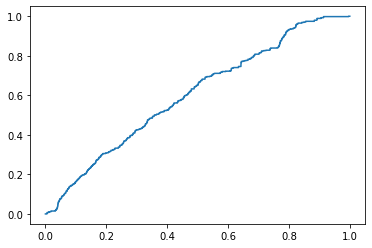

In [64]:
plt.plot(fpr, tpr)
AUC(fpr, tpr)
plt.xlabel('False positive rate', size=15)
plt.ylabel('True positive rate', size=15)
plt.title('NicheNet vs. single_drug_pert_A', size=12)
plt.legend(['ROC AUC=' + str(AUC(fpr, tpr))[:4]])
plt.tight_layout()
print(AUC(fpr, tpr))
plt.tight_layout()

In [ ]:
def NN_compare(similarity_name) :
    #ROC
    y_pr=similarity
    y_true=truedata
    fpr, tpr, th=ROC(y_true=y_true, y_score=y_pr)
    plt.subplot(121)
    plt.plot(fpr, tpr)
    plt.xlabel('False positive rate', size=15)
    plt.ylabel('True positive rate', size=15)
    plt.title(similarity_name, size=12)
    plt.legend(['ROC AUC=' + str(AUC(fpr, tpr))[:4]])
    plt.tight_layout()
    print(AUC(fpr, tpr))
    #PRC
    y_pred=similarity
    y_tr=truedata
    precision, recall, thresholds = PRC( y_true=y_tr, probas_pred=y_pred)
    plt.subplot(122)
    plt.plot(recall, precision)
    plt.xlabel('Recall', size=15)
    plt.ylabel('Precision', size=15)
    plt.title(similarity_name, size=12)
    random_AUC=np.sum(y_tr)/len(y_tr)
    real_AUC=AUC(recall, precision)
    plt.plot([0,1],[random_AUC,random_AUC], 'k:') #matplotlib colours, line stile
    print (AUC(recall,precision))
    print('Random AUC:',np.sum(y_tr)/len(y_tr))
    plt.legend(['PRC AUC=' + str(real_AUC)[:4], 'random AUC='+ str(random_AUC)[:4]])
    plt.tight_layout()

In [ ]:
NN_compare('drug_NN_sim')

In [ ]:
NN_compare('drug_A_NN_sim')

In [ ]:
NN_compare('gene_NN_sim')

In [ ]:
NN_compare('gene_A_NN_sim')

### Comparing LINCS with CREEDs

LINCS vs drug_perturb

In [67]:
similarity=pd.read_csv('../results/drug_pert_gse70138_trt_xpr.csv',sep=',',header=0,index_col=0)

In [68]:
meta = pd.read_csv('../results/drug_perturb.csv', sep=',', header=0, index_col=0)

In [69]:
true_matrix = pd.DataFrame(0, index=similarity.index, columns=similarity.columns)
for sample in true_matrix.columns:
    target = meta.loc[int(sample), 'Target']
    fil = lr_network['to'] == target
    ligands = lr_network['from'][fil].unique()
    ligands = list(set(ligands) & set(true_matrix.index))
    true_matrix.loc[ligands, sample] = 1
    if target in true_matrix.index:
        true_matrix.loc[target, sample] = 1

In [70]:
y_pr = similarity.values.reshape((1, -1))[0]
y_tr = true_matrix.values.reshape((1, -1))[0]
fil = ~pd.isna(y_pr)
y_pr = y_pr[fil]
y_tr = y_tr[fil]

In [71]:
fpr, tpr, dummy = ROC(y_tr, y_pr)

0.25964953677255903

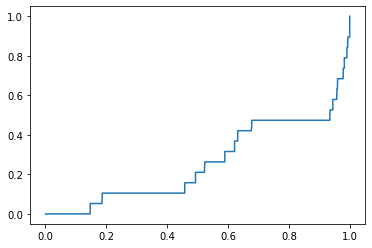

In [72]:
plt.plot(fpr, tpr)
AUC(fpr, tpr)

In [83]:
def drug_lincs_compare(similarity_name) :
    similarity=pd.read_csv('../results/'+similarity_name+'.csv',sep=',',header=0,index_col=0)
    meta = pd.read_csv('../results/drug_perturb.csv', sep=',', header=0, index_col=0)
    true_matrix = pd.DataFrame(0, index=similarity.index, columns=similarity.columns)
    for sample in true_matrix.columns:
        target = meta.loc[int(sample), 'Target']
        fil = lr_network['to'] == target
        ligands = lr_network['from'][fil].unique()
        ligands = list(set(ligands) & set(true_matrix.index))
        true_matrix.loc[ligands, sample] = 1
        if target in true_matrix.index:
            true_matrix.loc[target, sample] = 1
            
    y_pr = similarity.values.reshape((1, -1))[0]
    y_tr = true_matrix.values.reshape((1, -1))[0]
    fil = ~pd.isna(y_pr)
    y_pr = y_pr[fil]
    y_tr = y_tr[fil]
    fpr, tpr, dummy = ROC(y_tr, y_pr)
    #ROC
    plt.plot(fpr, tpr)
    AUC(fpr, tpr)
    plt.xlabel('False positive rate', size=15)
    plt.ylabel('True positive rate', size=15)
    plt.title(similarity_name, size=12)
    plt.legend(['ROC AUC=' + str(AUC(fpr, tpr))[:4]])
    plt.tight_layout()
    print(AUC(fpr, tpr))
    
    plt.tight_layout()

0.25964953677255903


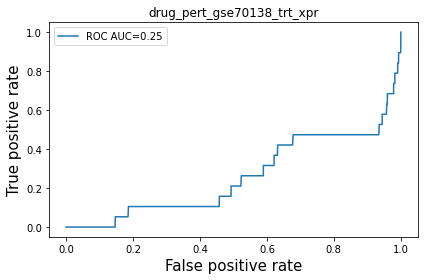

In [84]:
drug_lincs_compare('drug_pert_gse70138_trt_xpr')

0.4994597749683316


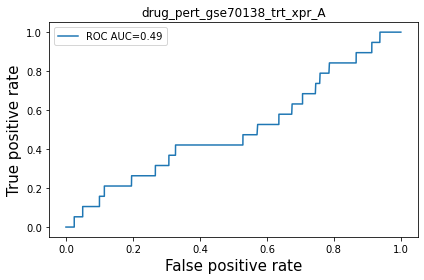

In [91]:
drug_lincs_compare('drug_pert_gse70138_trt_xpr_A')

0.5817178626913765


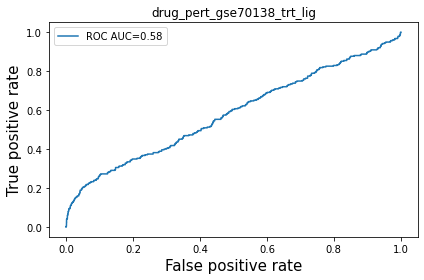

In [92]:
drug_lincs_compare('drug_pert_gse70138_trt_lig')

0.6041855405901855


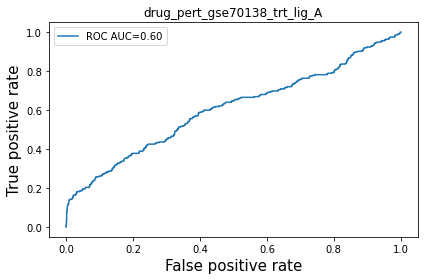

In [93]:
drug_lincs_compare('drug_pert_gse70138_trt_lig_A')

0.5287272563215218


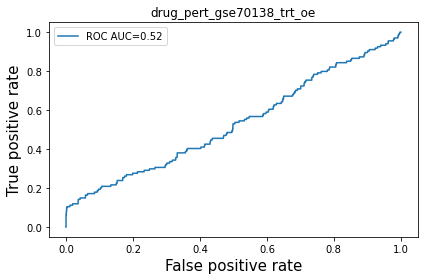

In [94]:
drug_lincs_compare('drug_pert_gse70138_trt_oe')

0.5762226385851681


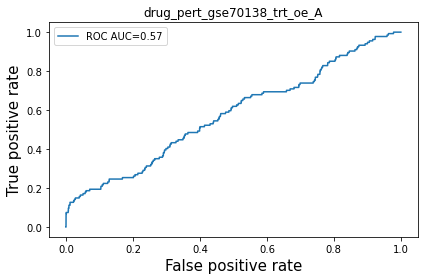

In [95]:
drug_lincs_compare('drug_pert_gse70138_trt_oe_A')

0.461105658357762


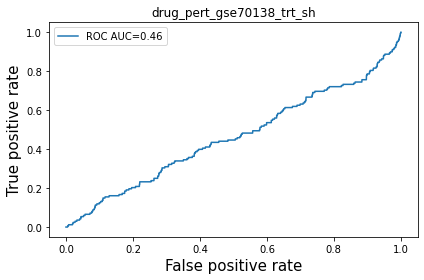

In [96]:
drug_lincs_compare('drug_pert_gse70138_trt_sh')

0.5100165321561676


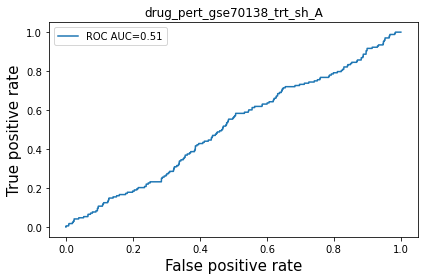

In [97]:
drug_lincs_compare('drug_pert_gse70138_trt_sh_A')

0.48306970304746555


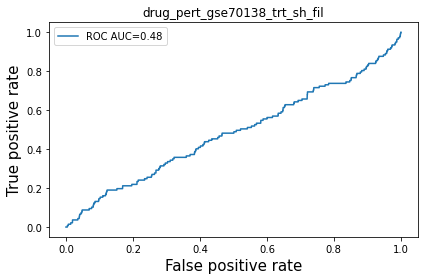

In [98]:
drug_lincs_compare('drug_pert_gse70138_trt_sh_fil')

0.4767421200624377


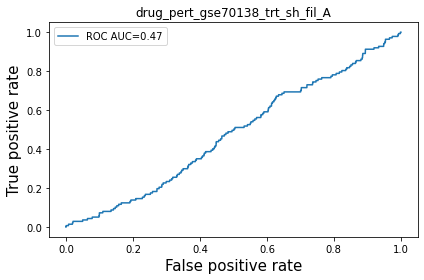

In [99]:
drug_lincs_compare('drug_pert_gse70138_trt_sh_fil_A')

0.3914023496684136


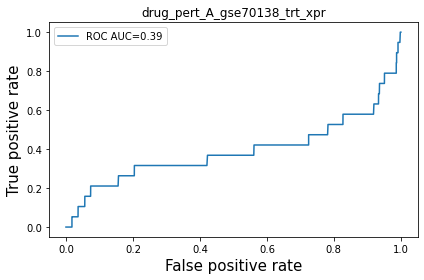

In [100]:
drug_lincs_compare('drug_pert_A_gse70138_trt_xpr')

0.6276607635180447


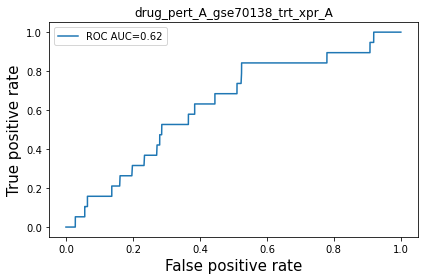

In [101]:
drug_lincs_compare('drug_pert_A_gse70138_trt_xpr_A')

0.5346765798104715


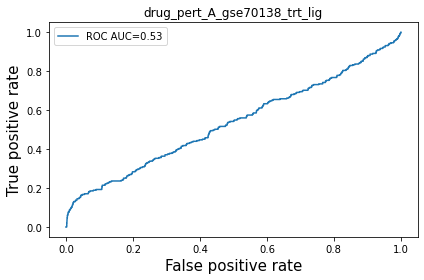

In [102]:
drug_lincs_compare('drug_pert_A_gse70138_trt_lig')

0.6598673255757339


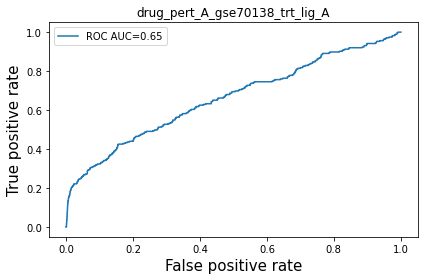

In [103]:
drug_lincs_compare('drug_pert_A_gse70138_trt_lig_A')

0.5386311330969618


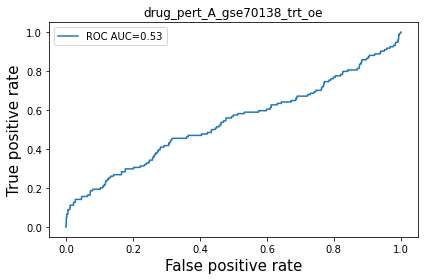

In [104]:
drug_lincs_compare('drug_pert_A_gse70138_trt_oe')

0.5661592110570901


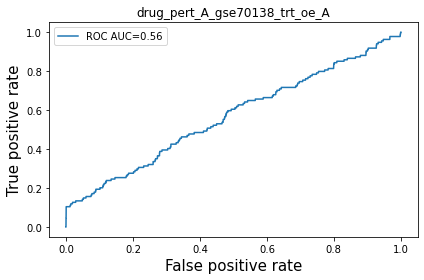

In [105]:
drug_lincs_compare('drug_pert_A_gse70138_trt_oe_A')

0.4916865167238119


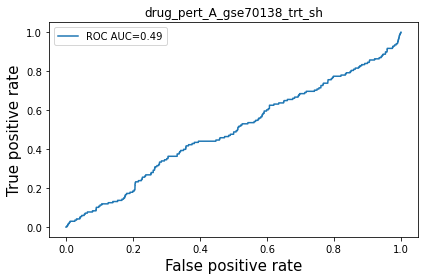

In [106]:
drug_lincs_compare('drug_pert_A_gse70138_trt_sh')

0.49935399441238465


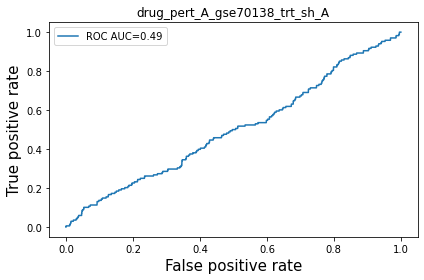

In [107]:
drug_lincs_compare('drug_pert_A_gse70138_trt_sh_A')

0.49311744214670294


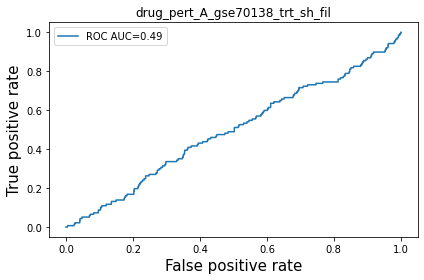

In [108]:
drug_lincs_compare('drug_pert_A_gse70138_trt_sh_fil')

0.46315065226473506


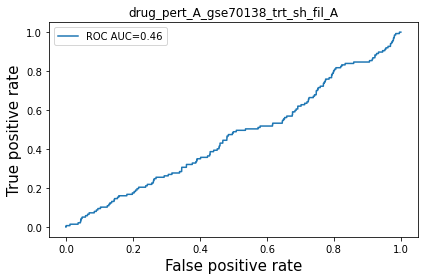

In [109]:
drug_lincs_compare('drug_pert_A_gse70138_trt_sh_fil_A')

In [89]:
def gene_lincs_compare(similarity_name) :
    similarity=pd.read_csv('../results/'+similarity_name+'.csv',sep=',',header=0,index_col=0)
    meta = pd.read_csv('../results/gene_perturb.csv', sep=',', header=0, index_col=0)
    true_matrix = pd.DataFrame(0, index=similarity.index, columns=similarity.columns)
    for sample in true_matrix.columns:
        target = meta.loc[int(sample), 'hs_gene_symbol']
        fil = lr_network['to'] == target
        ligands = lr_network['from'][fil].unique()
        ligands = list(set(ligands) & set(true_matrix.index))
        true_matrix.loc[ligands, sample] = 1
        if target in true_matrix.index:
            true_matrix.loc[target, sample] = 1
            
    y_pr = similarity.values.reshape((1, -1))[0]
    y_tr = true_matrix.values.reshape((1, -1))[0]
    fil = ~pd.isna(y_pr)
    y_pr = y_pr[fil]
    y_tr = y_tr[fil]
    fpr, tpr, dummy = ROC(y_tr, y_pr)
    #ROC
    plt.plot(fpr, tpr)
    AUC(fpr, tpr)
    plt.xlabel('False positive rate', size=15)
    plt.ylabel('True positive rate', size=15)
    plt.title(similarity_name, size=12)
    plt.legend(['ROC AUC=' + str(AUC(fpr, tpr))[:4]])
    plt.tight_layout()
    print(AUC(fpr, tpr))
    
    plt.tight_layout()

0.5333333333333333


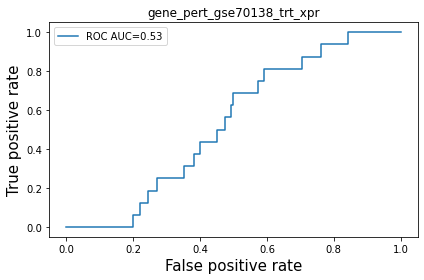

In [90]:
gene_lincs_compare('gene_pert_gse70138_trt_xpr')

0.5329337899543379


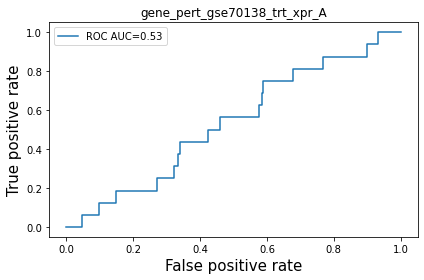

In [110]:
gene_lincs_compare('gene_pert_gse70138_trt_xpr_A')

0.5691807366308694


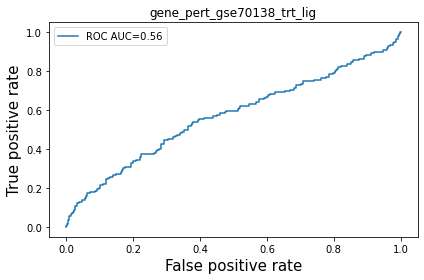

In [111]:
gene_lincs_compare('gene_pert_gse70138_trt_lig')

0.5656744932490426


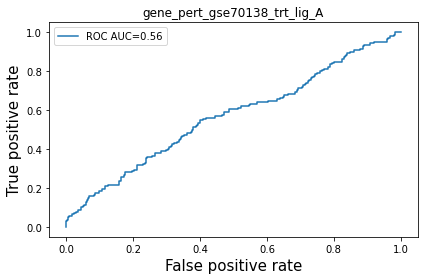

In [112]:
gene_lincs_compare('gene_pert_gse70138_trt_lig_A')

0.5116226075302335


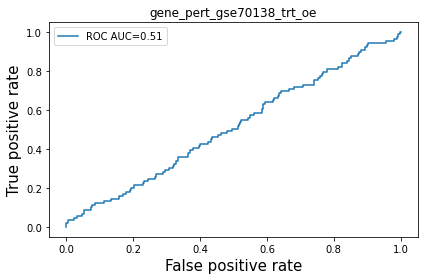

In [113]:
gene_lincs_compare('gene_pert_gse70138_trt_oe')

0.4922181199046482


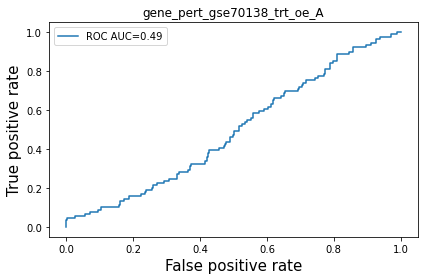

In [114]:
gene_lincs_compare('gene_pert_gse70138_trt_oe_A')

0.4860717505660807


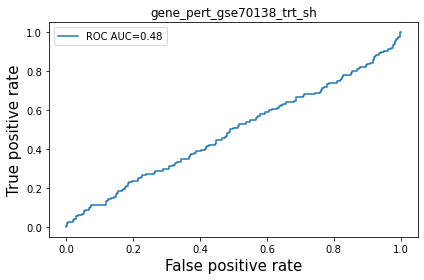

In [115]:
gene_lincs_compare('gene_pert_gse70138_trt_sh')

0.4907149743968543


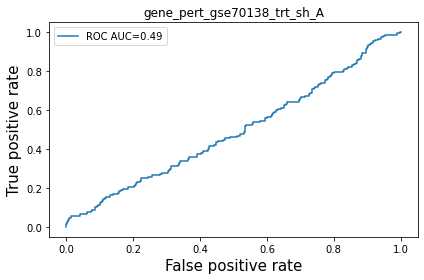

In [116]:
gene_lincs_compare('gene_pert_gse70138_trt_sh_A')

0.46147644919669323


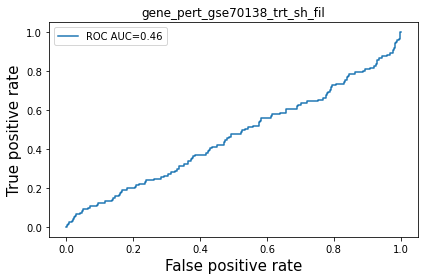

In [117]:
gene_lincs_compare('gene_pert_gse70138_trt_sh_fil')

0.5012723624998604


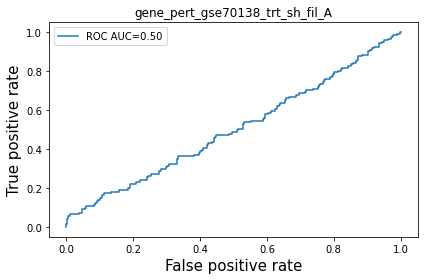

In [118]:
gene_lincs_compare('gene_pert_gse70138_trt_sh_fil_A')

0.4865867579908676


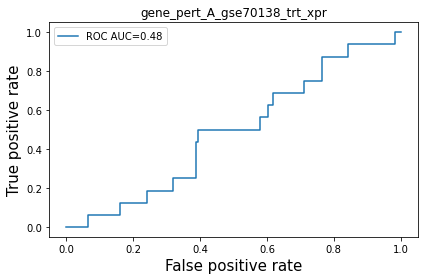

In [119]:
gene_lincs_compare('gene_pert_A_gse70138_trt_xpr')

0.45022831050228307


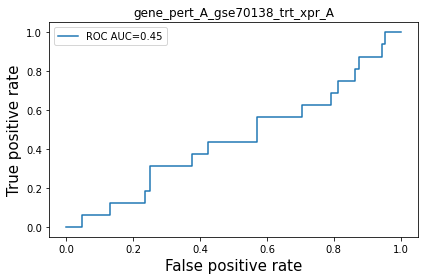

In [120]:
gene_lincs_compare('gene_pert_A_gse70138_trt_xpr_A')

0.5467898536041571


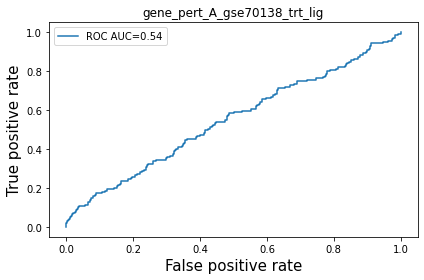

In [121]:
gene_lincs_compare('gene_pert_A_gse70138_trt_lig')

0.5477821167787394


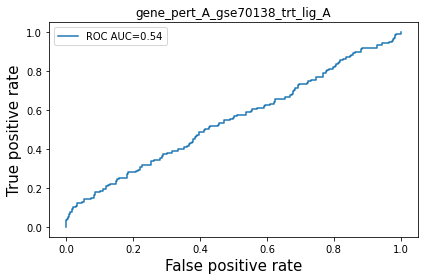

In [122]:
gene_lincs_compare('gene_pert_A_gse70138_trt_lig_A')

0.4992392865939388


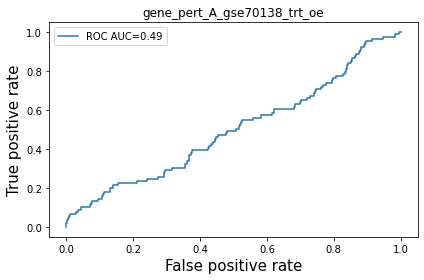

In [123]:
gene_lincs_compare('gene_pert_A_gse70138_trt_oe')

0.47765185553263145


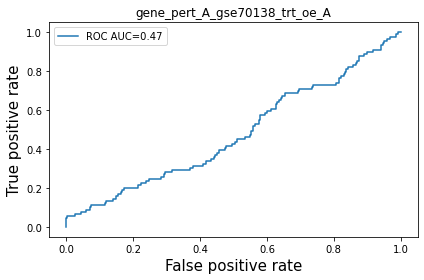

In [124]:
gene_lincs_compare('gene_pert_A_gse70138_trt_oe_A')

0.520814668816819


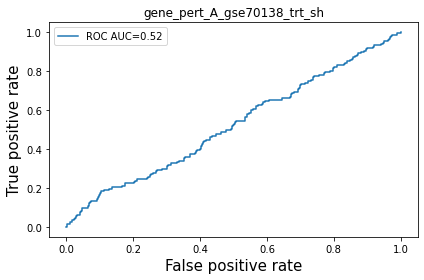

In [125]:
gene_lincs_compare('gene_pert_A_gse70138_trt_sh')

0.5342124904671299


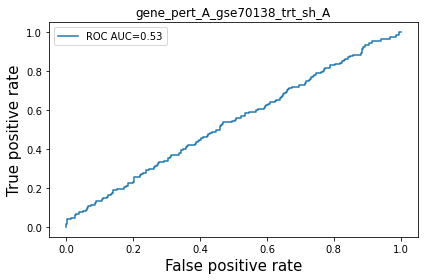

In [126]:
gene_lincs_compare('gene_pert_A_gse70138_trt_sh_A')

0.48813247458687


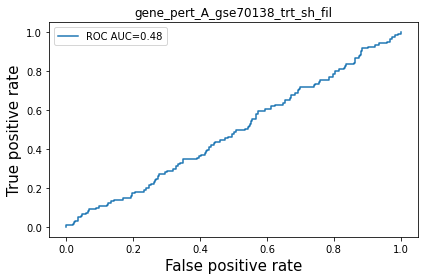

In [127]:
gene_lincs_compare('gene_pert_A_gse70138_trt_sh_fil')

0.5375018145589041


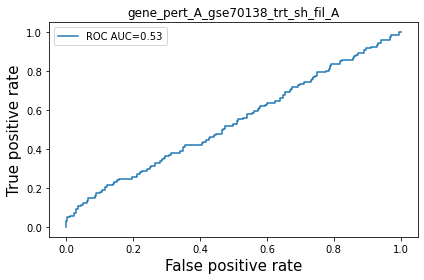

In [128]:
gene_lincs_compare('gene_pert_A_gse70138_trt_sh_fil_A')